In [44]:
import pandas as pd
import datetime

In [45]:
import sys
sys.path.append("../.")

In [46]:
import nbg_gov
import tbc

In [47]:
start_dt = datetime.datetime(year=2021, month=1, day=1)
end_dt = datetime.datetime.now()

currencies = ['USD']

nbg_prefix = "NBG_{}_{}".format(start_dt.strftime('%F'), end_dt.strftime('%F'))
tbc_prefix = "TBC_{}_{}".format(start_dt.strftime('%F'), end_dt.strftime('%F'))

In [48]:
# NBG
nbg_gov.crawl(
    save_fpath_prefix=nbg_prefix,
    currencies=currencies,
    start_dt=start_dt,
    end_dt=end_dt,
)

nbg_paruqets = (nbg_gov.save_fpath_generator('parquet', nbg_prefix, c) for c in currencies)

dfs = []
for pp in nbg_paruqets:
    dfs.append(pd.read_parquet(path=pp, engine='pyarrow'))

ParseResult(scheme='https', netloc='nbg.gov.ge', path='/gw/api/ct/monetarypolicy/currencies/', params='', query='currencies=USD&currencies=USD&end=2023-06-13T04%3A37%3A39.818Z&start=2023-05-24T04%3A37%3A39.818Z', fragment='')
{'currencies': ['USD', 'USD'], 'end': ['2023-06-13T04:37:39.818Z'], 'start': ['2023-05-24T04:37:39.818Z']}
{'currencies': 'USD', 'end': '2023-08-03', 'start': '2021-01-01'}
currencies=USD&end=2023-08-03&start=2021-01-01
ParseResult(scheme='https', netloc='nbg.gov.ge', path='/gw/api/ct/monetarypolicy/currencies/', params='', query='currencies=USD&end=2023-08-03&start=2021-01-01', fragment='')
https://nbg.gov.ge/gw/api/ct/monetarypolicy/currencies/?currencies=USD&end=2023-08-03&start=2021-01-01


200
[{'date': '2023-08-03T00:00:00.000Z', 'currencies': [{'code': 'USD', 'quantity': 1, 'rateFormated': '2.6185', 'diffFormated': '0.0030', 'rate': 2.6185, 'name': 'US Dollar', 'diff': -0.003, 'date': '2023-08-02T17:45:05.004Z', 'validFromDate': '2023-08-03T00:00:00.000Z'}]}, {'date': '2023-08-02T00:00:00.000Z', 'currencies': [{'code': 'USD', 'quantity': 1, 'rateFormated': '2.6215', 'diffFormated': '0.0107', 'rate': 2.6215, 'name': 'US Dollar', 'diff': -0.0107, 'date': '2023-08-01T17:45:03.216Z', 'validFromDate': '2023-08-02T00:00:00.000Z'}]}, {'date': '2023-08-01T00:00:00.000Z', 'currencies': [{'code': 'USD', 'quantity': 1, 'rateFormated': '2.6322', 'diffFormated': '0.0111', 'rate': 2.6322, 'name': 'US Dollar', 'diff': -0.0111, 'date': '2023-07-31T17:45:01.374Z', 'validFromDate': '2023-08-01T00:00:00.000Z'}]}, {'date': '2023-07-29T00:00:00.000Z', 'currencies': [{'code': 'USD', 'quantity': 1, 'rateFormated': '2.6433', 'diffFormated': '0.0058', 'rate': 2.6433, 'name': 'US Dollar', 'diff

In [49]:
nbg_df = pd.concat(dfs)

In [50]:
nbg_df[nbg_df['currencies'].apply(lambda r: len(r) > 1)]

,date,currencies


In [51]:
nbg_df[nbg_df['currencies'].apply(lambda r: len(r) < 1)]

,date,currencies


In [52]:
nbg_df['rate'] = nbg_df['currencies'].apply(lambda r: r[0]['rate'])
nbg_df['prev_date'] = nbg_df['currencies'].apply(lambda r: r[0]['date'])
nbg_df['diff'] = nbg_df['currencies'].apply(lambda r: r[0]['diff'])
nbg_df['code'] = nbg_df['currencies'].apply(lambda r: r[0]['code'])

In [53]:
save_path_prefix = tbc.save_fpath_generator(ftype='results_prefix', prefix=tbc_prefix)
marker_path = tbc.save_fpath_generator(ftype='marker', prefix=tbc_prefix)

tbc.paginated_crawl(
    save_fpath_prefix=save_path_prefix, 
    marker_fpath=marker_path, 
    start_dt=start_dt,
    end_dt=end_dt, 
    currencies=currencies
)

results = tbc.paginated_parse(
    save_fpath_prefix=save_path_prefix, 
    marker_fpath=marker_path, 
    start_dt=start_dt,
    end_dt=end_dt, 
    currencies=currencies
)
print(results)

tbc_df = pd.DataFrame(results)
parquet_path = tbc.save_fpath_generator(ftype='parquet', prefix=tbc_prefix)
tbc.save_parquet(path=parquet_path, df=tbc_df)

Paginated crawl for 2021-01-01 00:00:00 - 2023-08-03 09:55:16.097677
Delta Days : 945 /// Pages to go back: 134
Saving: ./markers/TBC_2021-01-01_2023-08-03.marker...
Content is saved to ./markers/TBC_2021-01-01_2023-08-03.marker
Marker is written to ./markers/TBC_2021-01-01_2023-08-03.marker
2023-08-03 09:55:16.097677


200
<RequestsCookieJar[<Cookie TS01441710=01863392ed22575d228de441e28d42224092173e8ba64814aa3bbf2210b28f56181bb9b1e98ae2692094a0d8b4bb8fcd6152b0cd45 for .www.tbcbank.ge/>, <Cookie JSESSIONID=sC2ACLz5tumq-6KM0rrrlkzS for www.tbcbank.ge/web>, <Cookie TS01987dc4=01863392ed22575d228de441e28d42224092173e8ba64814aa3bbf2210b28f56181bb9b1e98ae2692094a0d8b4bb8fcd6152b0cd45 for www.tbcbank.ge/web>]>
Saving: ./results/TBC_2021-01-01_2023-08-03_p000.html...
Content is saved to ./results/TBC_2021-01-01_2023-08-03_p000.html
2023-07-23 09:55:16.097677
200
<RequestsCookieJar[<Cookie TS01441710=01863392ed22575d228de441e28d42224092173e8ba64814aa3bbf2210b28f56181bb9b1e98ae2692094a0d8b4bb8fcd6152b0cd45 for .www.tbcbank.ge/>]>
Saving: ./results/TBC_2021-01-01_2023-08-03_p001.html...
Content is saved to ./results/TBC_2021-01-01_2023-08-03_p001.html
2023-07-16 09:55:16.097677
200
<RequestsCookieJar[<Cookie TS01441710=01863392ed22575d228de441e28d42224092173e8ba64814aa3bbf2210b28f56181bb9b1e98ae2692094a0d8b4bb

In [54]:
tbc_df

,date,USD
0,"Dec 31, 2020",3.2766
1,"Jan 1, 2021",3.2766
2,"Jan 2, 2021",3.2766
3,"Jan 3, 2021",3.2766
4,"Jan 4, 2021",3.2766
...,...,...
941,"Jul 30, 2023",2.6433
942,"Jul 31, 2023",2.6433
943,"Aug 1, 2023",2.6322
944,"Aug 2, 2023",2.6215


In [55]:
tbc_df.iloc[0]['date']

'Dec 31, 2020'

In [56]:
import dateutil.parser as dparser

dparser.parse(tbc_df.iloc[0]['date'],fuzzy=True)

datetime.datetime(2020, 12, 31, 0, 0)

In [57]:
import dateutil.parser as dparser

dparser.parse(tbc_df.iloc[0]['date'],fuzzy=True).date()

datetime.date(2020, 12, 31)

In [58]:
tbc_df['dt'] = tbc_df.date.apply(lambda d: dparser.parse(d,fuzzy=True).date())

In [59]:
tbc_df['dt_str'] = tbc_df.date.apply(lambda d: dparser.parse(d,fuzzy=True).date().strftime('%F'))

In [60]:
tbc_df

,date,USD,dt,dt_str
0,"Dec 31, 2020",3.2766,2020-12-31,2020-12-31
1,"Jan 1, 2021",3.2766,2021-01-01,2021-01-01
2,"Jan 2, 2021",3.2766,2021-01-02,2021-01-02
3,"Jan 3, 2021",3.2766,2021-01-03,2021-01-03
4,"Jan 4, 2021",3.2766,2021-01-04,2021-01-04
...,...,...,...,...
941,"Jul 30, 2023",2.6433,2023-07-30,2023-07-30
942,"Jul 31, 2023",2.6433,2023-07-31,2023-07-31
943,"Aug 1, 2023",2.6322,2023-08-01,2023-08-01
944,"Aug 2, 2023",2.6215,2023-08-02,2023-08-02


In [61]:
nbg_df['dt'] = nbg_df.date.apply(lambda d: dparser.parse(d,fuzzy=True).date())

In [62]:
nbg_df['dt_str'] = nbg_df.date.apply(lambda d: dparser.parse(d,fuzzy=True).date().strftime('%F'))

In [63]:
tbc_df.dtypes

date       object
USD       float64
dt         object
dt_str     object
dtype: object

In [64]:
nbg_df.dtypes

date           object
currencies     object
rate          float64
prev_date      object
diff          float64
code           object
dt             object
dt_str         object
dtype: object

In [65]:
tbc_df.iloc[:10].set_index('dt_str')

,date,USD,dt
dt_str,,,
2020-12-31,"Dec 31, 2020",3.2766,2020-12-31
2021-01-01,"Jan 1, 2021",3.2766,2021-01-01
2021-01-02,"Jan 2, 2021",3.2766,2021-01-02
2021-01-03,"Jan 3, 2021",3.2766,2021-01-03
2021-01-04,"Jan 4, 2021",3.2766,2021-01-04
2021-01-05,"Jan 5, 2021",3.3028,2021-01-05
2021-01-06,"Jan 6, 2021",3.3074,2021-01-06
2021-01-07,"Jan 7, 2021",3.3001,2021-01-07
2021-01-08,"Jan 8, 2021",3.3001,2021-01-08


In [66]:
nbg_df.set_index('dt_str')

,date,currencies,rate,prev_date,diff,code,dt
dt_str,,,,,,,
2023-08-03,2023-08-03T00:00:00.000Z,"[{'code': 'USD', 'date': '2023-08-02T17:45:05....",2.6185,2023-08-02T17:45:05.004Z,-0.0030,USD,2023-08-03
2023-08-02,2023-08-02T00:00:00.000Z,"[{'code': 'USD', 'date': '2023-08-01T17:45:03....",2.6215,2023-08-01T17:45:03.216Z,-0.0107,USD,2023-08-02
2023-08-01,2023-08-01T00:00:00.000Z,"[{'code': 'USD', 'date': '2023-07-31T17:45:01....",2.6322,2023-07-31T17:45:01.374Z,-0.0111,USD,2023-08-01
2023-07-29,2023-07-29T00:00:00.000Z,"[{'code': 'USD', 'date': '2023-07-28T17:45:10....",2.6433,2023-07-28T17:45:10.599Z,-0.0058,USD,2023-07-29
2023-07-28,2023-07-28T00:00:00.000Z,"[{'code': 'USD', 'date': '2023-07-27T17:45:08....",2.6491,2023-07-27T17:45:08.638Z,0.0244,USD,2023-07-28
...,...,...,...,...,...,...,...
2021-01-05,2021-01-05T00:00:00.000Z,"[{'code': 'USD', 'date': '2021-01-04T17:01:08....",3.3028,2021-01-04T17:01:08.742Z,0.0262,USD,2021-01-05
2021-01-04,2021-01-04T00:00:00.000Z,"[{'code': 'USD', 'date': '2021-01-04T00:00:00....",3.2766,2021-01-04T00:00:00.000Z,0.0000,USD,2021-01-04
2021-01-03,2021-01-03T00:00:00.000Z,"[{'code': 'USD', 'date': '2021-01-03T00:00:00....",3.2766,2021-01-03T00:00:00.000Z,0.0000,USD,2021-01-03


In [67]:
df = tbc_df.set_index('dt_str').join(nbg_df[['dt_str', 'rate']].set_index('dt_str'))

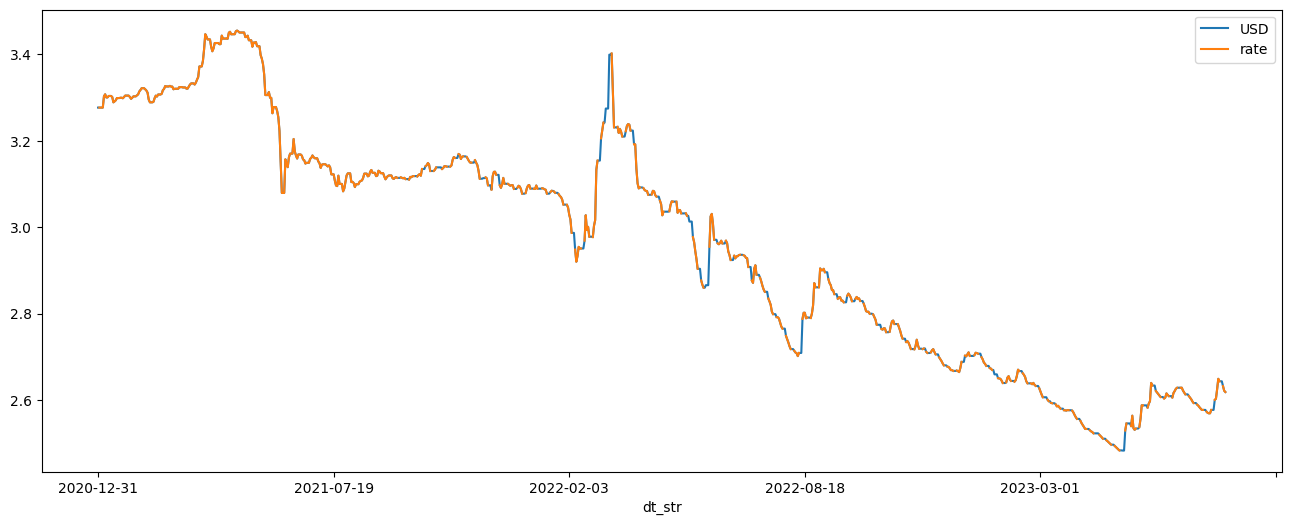

In [70]:
g = df.plot(kind='line')
g.figure.set_size_inches(16,6)